In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
def show_digit(index):
    digit = X[index]
    digit_img = digit.reshape(28, 28)
    plt.imshow(digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

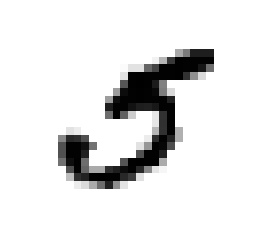

In [8]:
show_digit(36000)

In [12]:
# Split up dataset in test and training data
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
# and shuffle training data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X[shuffle_index], y_train[shuffle_index]

In [16]:
# Filter out non-fives
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/home/espe/Projects/Python/ml-notebooks/.env/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [21]:
# Predict the five above
sgd_clf.predict([X[36000]])
# And validate the model
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
# and use a confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53658,   921],
       [ 1297,  4124]])

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
print 'SGDClassifier precision:', precision_score(y_train_5, y_train_pred)
print 'SGDClassifier recall:', recall_score(y_train_5, y_train_pred)
print 'SGDClassifier F1:', f1_score(y_train_5, y_train_pred)

SGDClassifier precision: 0.8174430128840436
SGDClassifier recall: 0.760745249953883
SGDClassifier F1: 0.788075673609784
